In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

In [2]:
weight = 0.7
bias = 0.3

X = np.arange(0.0, 1.0, 0.02)
y = weight * X + bias

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weight = nn.Parameter(
            torch.randn(1,
                        requires_grad=True,
                        dtype=torch.float
                       )
        )
        
        self.bias = nn.Parameter(
            torch.randn(1,
                       requires_grad=True,
                       dtype=torch.float
                       )
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [6]:
def scatterData(l: list):
    for tpl in l:
        X = tpl[0]        
        y = tpl[1]
        
        plt.scatter(X, y)
        
    plt.show()

In [7]:
def plotData(l: list):
    for tpl in l:
        X = tpl[0]        
        y = tpl[1]
        
        plt.plot(X, y)
        
    plt.show()

In [8]:
torch.manual_seed(42)
model = LinearRegression()

In [9]:
loss = nn.L1Loss()

optim = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [10]:
torch.manual_seed(42)

epochs = 120
costs = []

for epoch in range( epochs ):
    model.train()
    
    y_pred = model(X_train)
    
    cost = loss(y_pred, y_train)
#     print(f"Cost: {cost}")
    costs.append( cost.item() )
    
    optim.zero_grad()
    
    cost.backward()
    
    optim.step()
    
    model.eval()

Current Cost: 0.004195420616865191


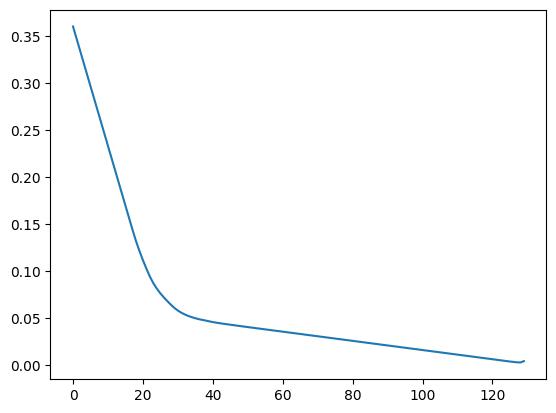

In [11]:
print(f"Current Cost: {costs[-1]}")
plotData([( [_ for _ in range(epochs)], costs )])

In [12]:
pred = model(X_test).detach().numpy()

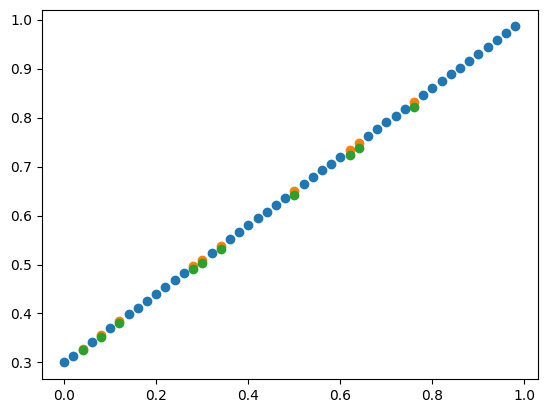

In [16]:
scatterData([(X_train, y_train), (X_test, y_test), (X_test, pred)])

In [14]:
print(f"Weight: {weight}, Bias: {bias}")
print(f"Pred. Weight: {model.weight.item():.2f}, Pred. Bias: {model.bias.item():.2f}")

Weight: 0.7, Bias: 0.3
Pred. Weight: 0.69, Pred. Bias: 0.30
